# Suicide Bombing Attacks (EDA)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltD
import seaborn as sns
import folium
from IPython.display import display, IFrame
from folium.plugins import HeatMap

# Loading the Dataset

In [ ]:
# Load the dataset
dataset_path = "/content/drive/MyDrive/Work/Projects/Suicide_bombing_attacks.csv"
data = pd.read_csv(dataset_path)

In [ ]:
# Display the first few rows of the dataset
print(data.head())

                      Date                   Islamic Date Blast Day Type  \
0  Sunday-November 19-1995  25 Jumaada al-THaany 1416 A.H        Holiday   
1   Monday-November 6-2000           10 SHa`baan 1421 A.H    Working Day   
2     Wednesday-May 8-2002              25 safar 1423 A.H    Working Day   
3      Friday-June 14-2002     3 Raby` al-THaany 1423 A.H    Working Day   
4       Friday-July 4-2003     4 Jumaada al-awal 1424 A.H    Working Day   

  Holiday Type         Time       City  Latitude Longitude     Province  \
0      Weekend          NaN  Islamabad   33.7180   73.0718      Capital   
1          NaN          NaN    Karachi   24.9918   66.9911        Sindh   
2          NaN      7:45 AM   Karachi    24.9918   66.9911        Sindh   
3          NaN  11:10:00 AM    Karachi   24.9918   66.9911        Sindh   
4          NaN          NaN     Quetta   30.2095   67.0182  Baluchistan   

                                            Location  ...  \
0                              

In [ ]:
print(data.shape)

(988, 25)


In [ ]:
data.columns

Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     988 non-null    object 
 1   Islamic Date             678 non-null    object 
 2   Blast Day Type           967 non-null    object 
 3   Holiday Type             144 non-null    object 
 4   Time                     566 non-null    object 
 5   City                     988 non-null    object 
 6   Latitude                 983 non-null    float64
 7   Longitude                983 non-null    object 
 8   Province                 988 non-null    object 
 9   Location                 982 non-null    object 
 10  Location Category        988 non-null    object 
 11  Location Sensitivity     988 non-null    object 
 12  Open/Closed Space        918 non-null    object 
 13  Influencing Event/Event  378 non-null    object 
 14  Target Type              9

In [ ]:
# Summary statistics
print(data.describe())

         Latitude  Killed Min  Killed Max  Injured Min  No. of Suicide Blasts  \
count  983.000000   696.00000  988.000000   726.000000             824.000000   
mean    32.618279    14.79023   15.253138    31.498623               1.116505   
std      2.475619    17.61733   19.957268    38.656426               0.395625   
min     24.879503     0.00000    0.000000     0.000000               1.000000   
25%     31.823800     3.00000    3.000000     7.000000               1.000000   
50%     33.583300     8.00000    8.000000    20.000000               1.000000   
75%     34.004300    20.25000   18.000000    40.000000               1.000000   
max     35.383300   125.00000  148.000000   320.000000               4.000000   

       Temperature(C)  Temperature(F)  
count      978.000000      974.000000  
mean        21.093650       69.939612  
std          8.375656       15.081500  
min         -2.370000       27.734000  
25%         14.650000       58.282250  
50%         21.295000       70

In [ ]:
# Check for missing values
print(data.isnull().sum())

Date                         0
Islamic Date               310
Blast Day Type              21
Holiday Type               844
Time                       422
City                         0
Latitude                     5
Longitude                    5
Province                     0
Location                     6
Location Category            0
Location Sensitivity         0
Open/Closed Space           70
Influencing Event/Event    610
Target Type                  0
Targeted Sect if any       794
Killed Min                 292
Killed Max                   0
Injured Min                262
Injured Max                 64
No. of Suicide Blasts      164
Explosive Weight (max)     647
Hospital Names             397
Temperature(C)              10
Temperature(F)              14
dtype: int64


In [ ]:
# Lets see the missing values and their percentage
total=data.isnull().sum().sort_values(ascending=False)
percentage=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
missing_data

,Total,Percentage
Holiday Type,844,0.854251
Targeted Sect if any,794,0.803644
Explosive Weight (max),647,0.654858
Influencing Event/Event,610,0.617409
Time,422,0.427126
Hospital Names,397,0.401822
Islamic Date,310,0.313765
Killed Min,292,0.295547
Injured Min,262,0.265182
No. of Suicide Blasts,164,0.165992


# Cleaning of Data

In [ ]:
data['Explosive Weight (max)'].mode()
data.loc[data['Explosive Weight (max)'] == 'PRT', 'Explosive Weight (max)'].count()
data['Explosive Weight (max)'].fillna(data['Explosive Weight (max)'].mode()[0], inplace=True)

In [ ]:
data['Hospital Names'].mode()
data.loc[data['Hospital Names'] == 'PRT', 'Hospital Names'].count()
data['Hospital Names'].fillna(data['Hospital Names'].mode()[0], inplace=True)

In [ ]:
data['Holiday Type'].mode()
data.loc[data['Holiday Type'] == 'PRT', 'Holiday Type'].count()
data['Holiday Type'].fillna(data['Holiday Type'].mode()[0], inplace=True)

In [ ]:
data['Time'].mode()
data.loc[data['Time'] == 'PRT', 'Time'].count()
data['Time'].fillna(data['Time'].mode()[0], inplace=True)

In [ ]:
data['Location'].mode()
data.loc[data['Location'] == 'PRT', 'Location'].count()
data['Location'].fillna(data['Location'].mode()[0], inplace=True)

In [ ]:
data['Influencing Event/Event'].mode()
data.loc[data['Influencing Event/Event'] == 'PRT', 'Influencing Event/Event'].count()
data['Influencing Event/Event'].fillna(data['Influencing Event/Event'].mode()[0], inplace=True)

In [ ]:
data['Targeted Sect if any'].mode()
data.loc[data['Targeted Sect if any'] == 'PRT', 'Targeted Sect if any'].count()
data['Targeted Sect if any'].fillna(data['Targeted Sect if any'].mode()[0], inplace=True)

In [ ]:
data['Killed Min'].mode()
data.loc[data['Killed Min'] == 'PRT', 'Killed Min'].count()
data['Killed Min'].fillna(data['Killed Min'].mode()[0], inplace=True)

In [ ]:
data['Injured Min'].mode()
data.loc[data['Injured Min'] == 'PRT', 'Injured Min'].count()
data['Injured Min'].fillna(data['Injured Min'].mode()[0], inplace=True)

In [ ]:
data['Blast Day Type'].mode()
data.loc[data['Blast Day Type'] == 'PRT', 'Blast Day Type'].count()
data['Blast Day Type'].fillna(data['Blast Day Type'].mode()[0], inplace=True)

In [ ]:
data['Open/Closed Space'].mode()
data.loc[data['Open/Closed Space'] == 'PRT', 'Open/Closed Space'].count()
data['Open/Closed Space'].fillna(data['Open/Closed Space'].mode()[0], inplace=True)

In [ ]:
data['No. of Suicide Blasts'].mode()
data.loc[data['No. of Suicide Blasts'] == 'PRT', 'No. of Suicide Blasts'].count()
data['No. of Suicide Blasts'].fillna(data['No. of Suicide Blasts'].mode()[0], inplace=True)

In [ ]:
data['Injured Max'].mode()
data.loc[data['Injured Max'] == 'PRT', 'Injured Max'].count()
data['Injured Max'].fillna(data['Injured Max'].mode()[0], inplace=True)

In [ ]:
data['Islamic Date'].mode()
data.loc[data['Islamic Date'] == 'PRT', 'Islamic Date'].count()
data['Islamic Date'].fillna(data['Islamic Date'].mode()[0], inplace=True)

In [ ]:
data['Latitude'].median()
data['Longitude'].median()
#Filling the null values with the median value.
data['Latitude'].fillna(data['Latitude'].median(), inplace=True)
data['Longitude'].fillna(data['Longitude'].median(), inplace=True)

In [ ]:
# Check for missing values
print(data.isnull().sum())

Date                        0
Islamic Date                0
Blast Day Type              0
Holiday Type                0
Time                        0
City                        0
Latitude                    0
Longitude                   0
Province                    0
Location                    0
Location Category           0
Location Sensitivity        0
Open/Closed Space           0
Influencing Event/Event     0
Target Type                 0
Targeted Sect if any        0
Killed Min                  0
Killed Max                  0
Injured Min                 0
Injured Max                 0
No. of Suicide Blasts       0
Explosive Weight (max)      0
Hospital Names              0
Temperature(C)             10
Temperature(F)             14
dtype: int64


In [ ]:
# Lets see the missing values and their percentage
total=data.isnull().sum().sort_values(ascending=False)
percentage=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
missing_data

,Total,Percentage
Temperature(F),14,0.014170
Temperature(C),10,0.010121
Influencing Event/Event,0,0.000000
Hospital Names,0,0.000000
Explosive Weight (max),0,0.000000
No. of Suicide Blasts,0,0.000000
Injured Max,0,0.000000
Injured Min,0,0.000000
Killed Max,0,0.000000
Killed Min,0,0.000000


In [ ]:
#Creating a new column Date which contain dates without -
data["Date"]=data["Date"].str.replace("-"," ")
data.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday November 19 1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,Evening,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,Shiite,14.0,15.0,2.0,60,2.0,6kg,Lady Reading Hospital,15.835,60.503
1,Monday November 6 2000,10 SHa`baan 1421 A.H,Working Day,Weekend,Evening,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,Shiite,2.0,3.0,2.0,3,1.0,6kg,Lady Reading Hospital,23.770,74.786
2,Wednesday May 8 2002,25 safar 1423 A.H,Working Day,Weekend,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,Friday June 14 2002,3 Raby` al-THaany 1423 A.H,Working Day,Weekend,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,Christian,2.0,12.0,2.0,51,1.0,6kg,Lady Reading Hospital,31.430,88.574
4,Friday July 4 2003,4 Jumaada al-awal 1424 A.H,Working Day,Weekend,Evening,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,Shiite,44.0,47.0,2.0,65,1.0,6kg,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [ ]:
#Lets seperate day month and year from date
day_name=data.Date.str.split(' ').str[0]
month=data.Date.str.split(' ').str[1]
day=data.Date.str.split(' ').str[2]
year=data.Date.str.split(" ").str[3]
data["Day_name"]=day_name
data["Month"]=month
data["Day"]=day
data["Year"]=year
data.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F),Day_name,Month,Day,Year
0,Sunday November 19 1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,Evening,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,60,2.0,6kg,Lady Reading Hospital,15.835,60.503,Sunday,November,19,1995
1,Monday November 6 2000,10 SHa`baan 1421 A.H,Working Day,Weekend,Evening,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,3,1.0,6kg,Lady Reading Hospital,23.770,74.786,Monday,November,6,2000
2,Wednesday May 8 2002,25 safar 1423 A.H,Working Day,Weekend,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628,Wednesday,May,8,2002
3,Friday June 14 2002,3 Raby` al-THaany 1423 A.H,Working Day,Weekend,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,51,1.0,6kg,Lady Reading Hospital,31.430,88.574,Friday,June,14,2002
4,Friday July 4 2003,4 Jumaada al-awal 1424 A.H,Working Day,Weekend,Evening,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,65,1.0,6kg,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616,Friday,July,4,2003


In [ ]:
data["Islamic Date"]=data["Islamic Date"].str.replace(" al","-al")
data.head()

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F),Day_name,Month,Day,Year
0,Sunday November 19 1995,25 Jumaada-al-THaany 1416 A.H,Holiday,Weekend,Evening,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,60,2.0,6kg,Lady Reading Hospital,15.835,60.503,Sunday,November,19,1995
1,Monday November 6 2000,10 SHa`baan 1421 A.H,Working Day,Weekend,Evening,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,3,1.0,6kg,Lady Reading Hospital,23.770,74.786,Monday,November,6,2000
2,Wednesday May 8 2002,25 safar 1423 A.H,Working Day,Weekend,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628,Wednesday,May,8,2002
3,Friday June 14 2002,3 Raby`-al-THaany 1423 A.H,Working Day,Weekend,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,51,1.0,6kg,Lady Reading Hospital,31.430,88.574,Friday,June,14,2002
4,Friday July 4 2003,4 Jumaada-al-awal 1424 A.H,Working Day,Weekend,Evening,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,65,1.0,6kg,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616,Friday,July,4,2003


# Exploratory Data Analysis

In [ ]:
#Lets seperate day month and year from Islamic Date
day=data["Islamic Date"].str.split(' ').str[0]
month=data["Islamic Date"].str.split(' ').str[1]
year=data["Islamic Date"].str.split(' ').str[2]
data["Islamic_Day"]=day
data["Islamic_Month"]=month
data["Islamic_Year"]=year
data.drop("Islamic Date",axis=1,inplace=True)

data.drop("Date",axis=1,inplace=True)

In [ ]:
data["Injured Max"].dtypes

dtype('O')

In [ ]:
# Use the to_numeric method to convert the 'Injured Max' column to a numeric type
data["Injured Max"] = pd.to_numeric(data["Injured Max"], errors='coerce')
data["Injured Max"].dtypes

dtype('float64')

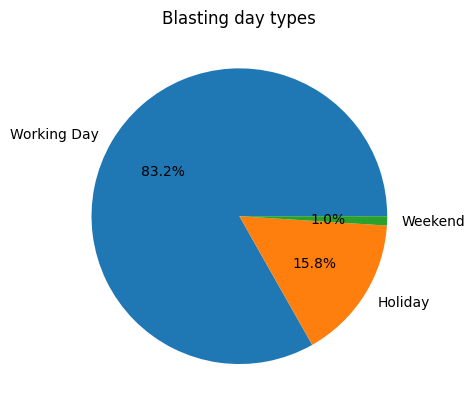

In [ ]:
# Create labels from the index of the value_counts() Series
labels = data['Blast Day Type'].value_counts().index.to_list()

# Plot the pie chart
plt.title('Blasting day types')
plt.pie(data['Blast Day Type'].value_counts().values, labels=labels, autopct='%1.1f%%')
plt.show()

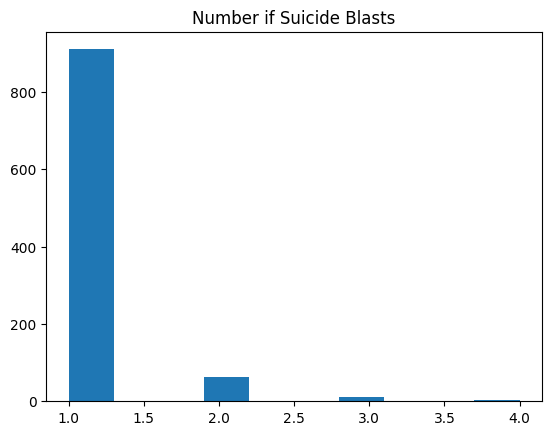

In [ ]:
plt.title("Number if Suicide Blasts")
plt.hist(data["No. of Suicide Blasts"].dropna());

In [ ]:
#Calculating average people killed and average people injured
data["Killed Avg"]=(data["Killed Max"]+data["Killed Min"])/2
data["Injured Avg"]=(data["Injured Max"]+data["Injured Min"]/2)

In [ ]:
data["Location Sensitivity"]=data["Location Sensitivity"].str.replace("low","Low")

<Axes: title={'center': 'Average People Killed per year'}, xlabel='Year', ylabel='Killed Avg'>

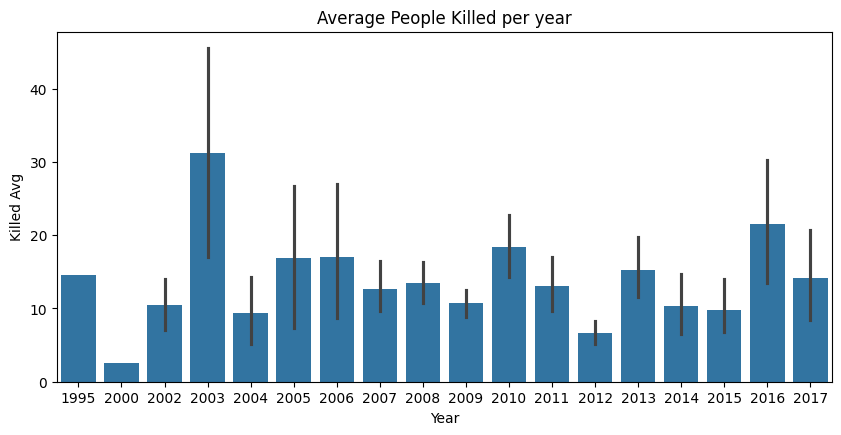

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("Average People Killed per year")
sns.barplot(x="Year", y="Killed Avg", data=data)

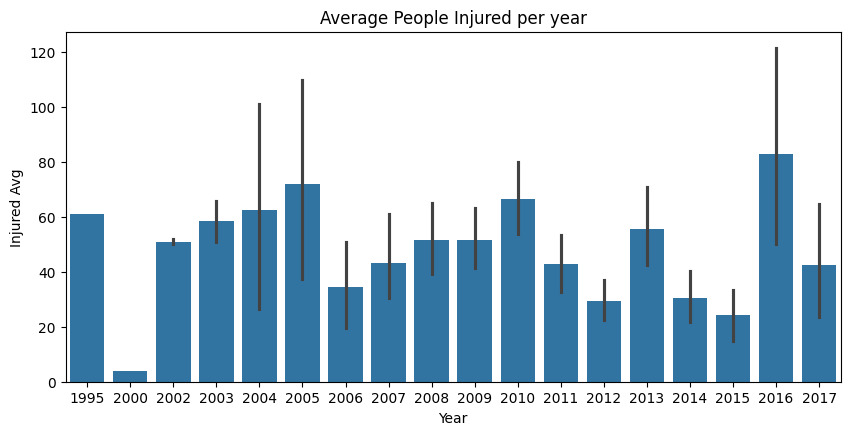

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.title("Average People Injured per year")
sns.barplot(x="Year", y="Injured Avg", data=data);

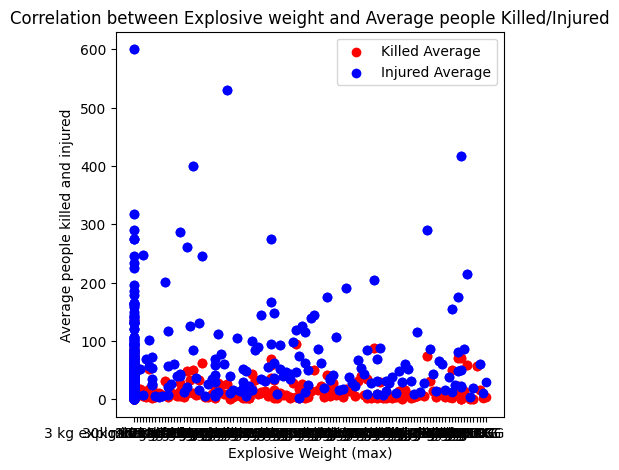

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel("Explosive Weight (max)")
plt.ylabel("Average people killed and injured")
plt.title("Correlation between Explosive weight and Average people Killed/Injured")
plt.scatter("Explosive Weight (max)","Killed Avg",data=data,label="Killed Average",color="r")
plt.scatter("Explosive Weight (max)","Injured Avg",data=data,label="Injured Average",color="b")
plt.legend(loc="upper right");

In [ ]:
W=data["Holiday Type"]=="Weekend"
P=data["Holiday Type"]=="Pakistan Day"
L=data["Holiday Type"]=="Labour Day"
I=data["Holiday Type"]=="Iqbal Day"
EF=data["Holiday Type"]=="Eid-ul-Fitar"
EN=data["Holiday Type"]=="Eid Milad un-Nabi"
A=data["Holiday Type"]=="Ashura"

In [ ]:
weekend=data[W]
pakistan_day=data[P]
labour_day=data[L]
iqbal_day=data[I]
eid_ul_fitar=data[W]
eid_milad_un_nabi=data[EN]
ashura=data[A]

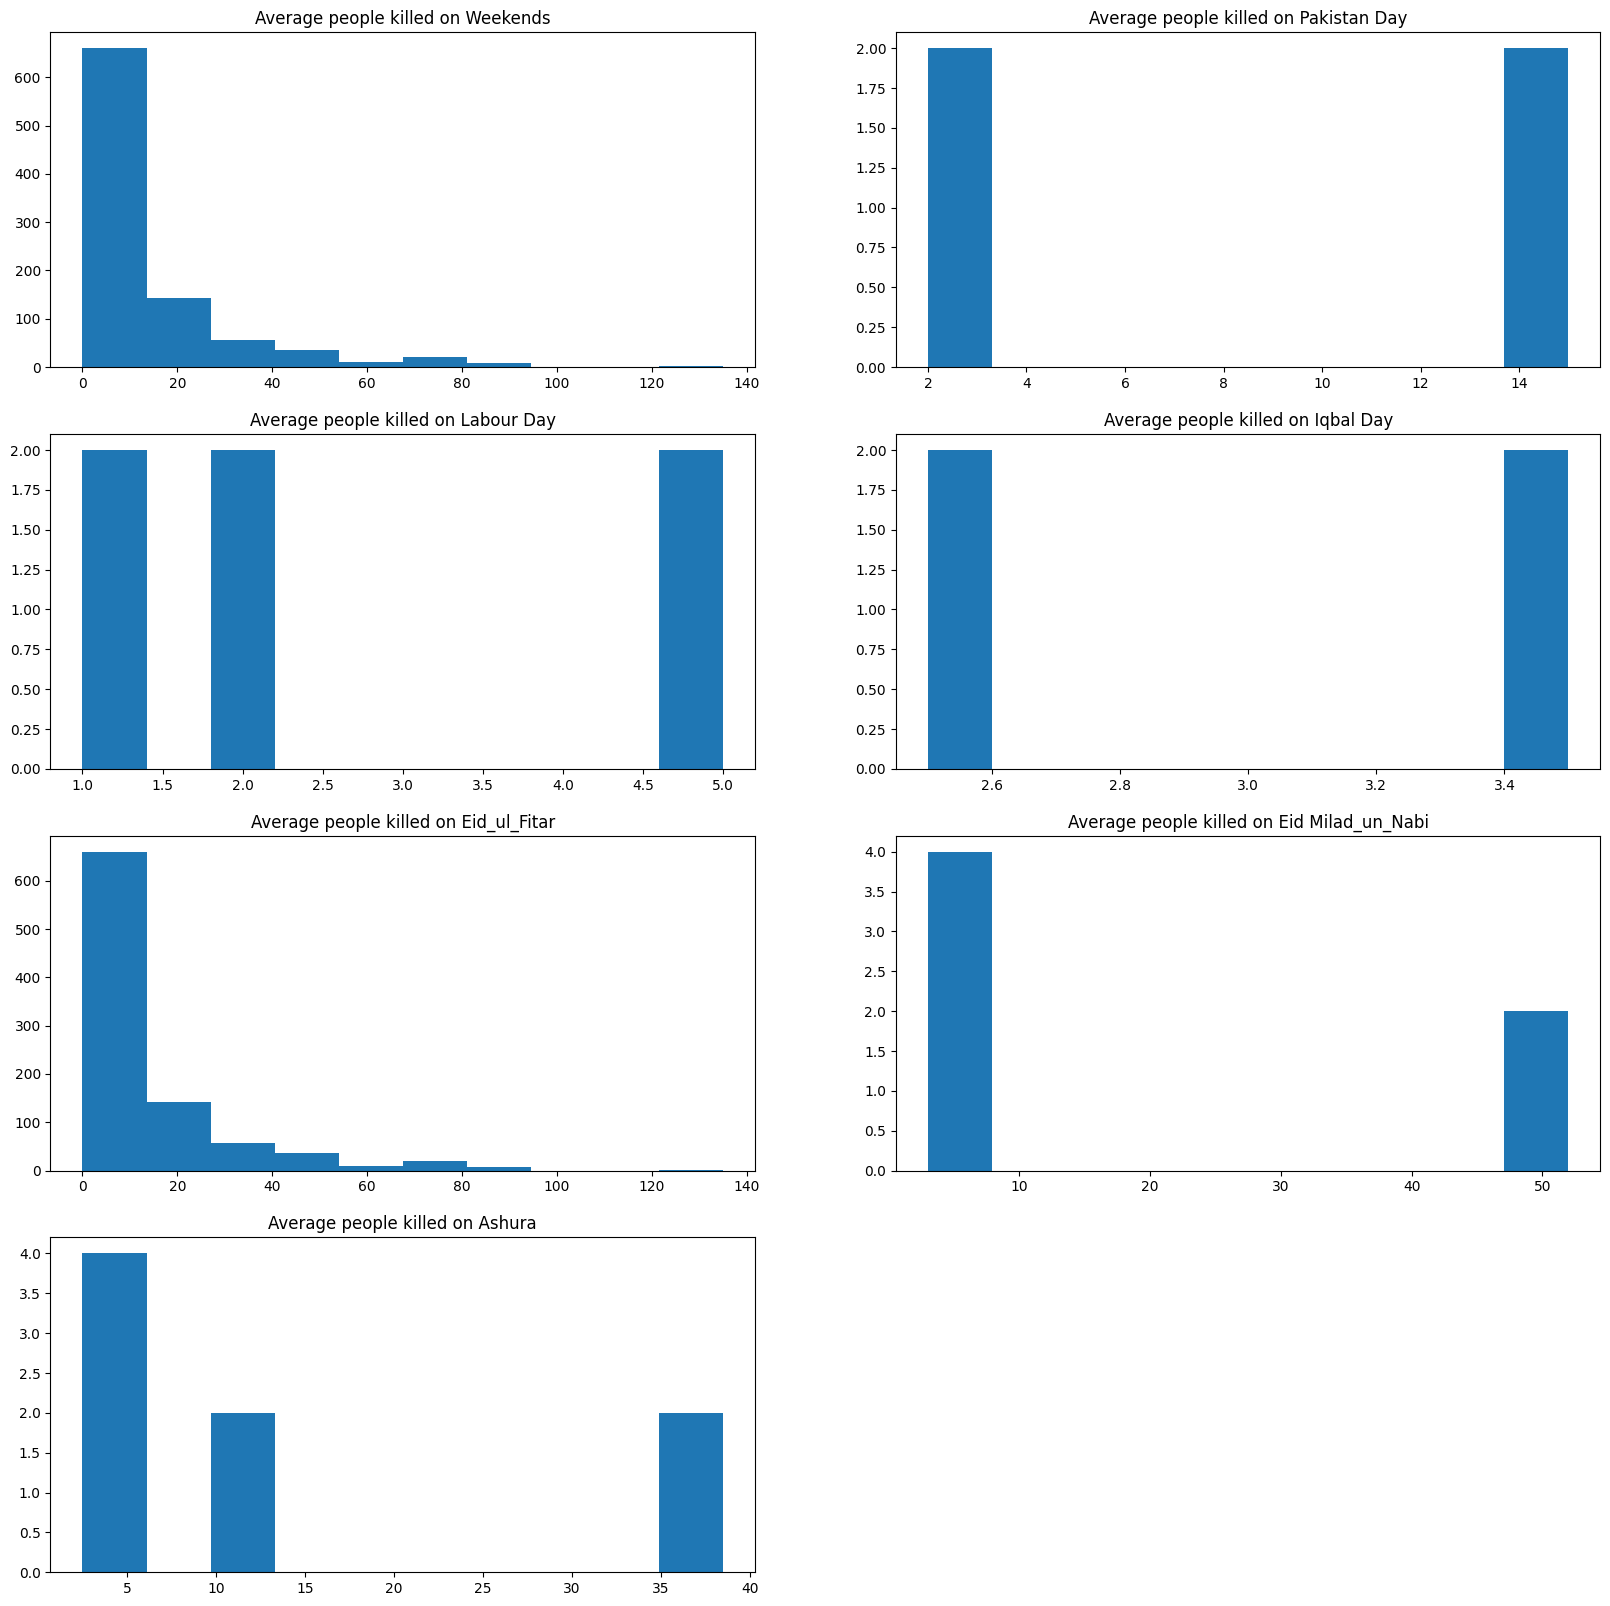

In [ ]:
#Average people killed on different holiday types
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.title("Average people killed on Weekends")
plt.hist(weekend["Killed Avg"])
plt.subplot(4,2,2)
plt.title("Average people killed on Pakistan Day")
plt.hist(pakistan_day["Killed Avg"])
plt.subplot(4,2,3)
plt.title("Average people killed on Labour Day")
plt.hist(labour_day["Killed Avg"])
plt.subplot(4,2,4)
plt.title("Average people killed on Iqbal Day")
plt.hist(iqbal_day["Killed Avg"])
plt.subplot(4,2,5)
plt.title("Average people killed on Eid_ul_Fitar")
plt.hist(eid_ul_fitar["Killed Avg"])
plt.subplot(4,2,6)
plt.title("Average people killed on Eid Milad_un_Nabi")
plt.hist(eid_milad_un_nabi["Killed Avg"])
plt.subplot(4,2,7)
plt.title("Average people killed on Ashura")
plt.hist(ashura["Killed Avg"]);

            City  Number of Attacks
0       Peshawar                143
1         Quetta                 67
2           Swat                 50
3          Bannu                 44
4        Karachi                 42
5     Rawalpindi                 38
6      Islamabad                 34
7          Hangu                 34
8  Khyber Agency                 28
9         Lahore                 28


<ipython-input-59-074c99bf304d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Attacks', y='City', data=top_10_cities, palette='viridis')


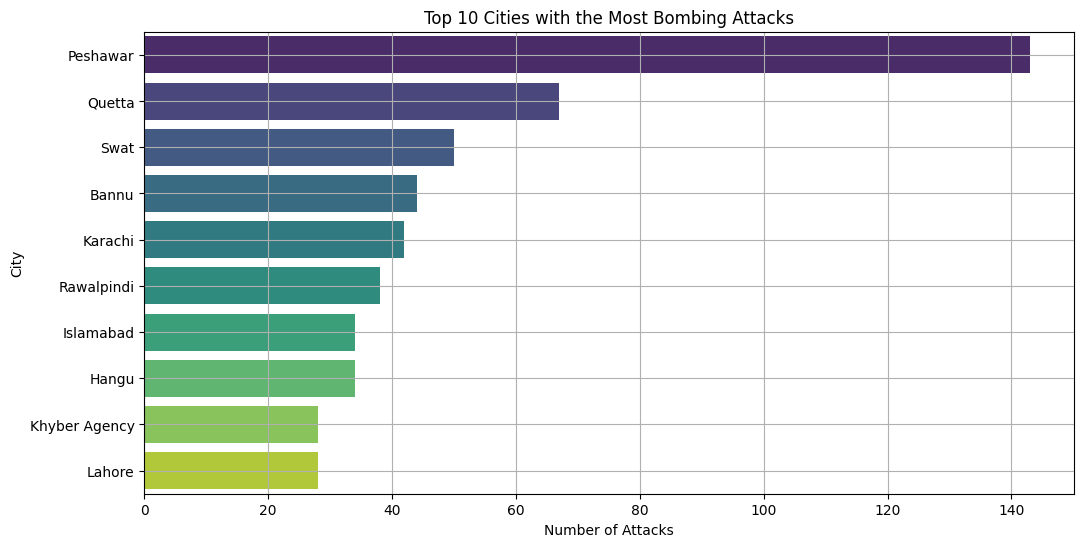

In [ ]:
# Assuming 'data' is your DataFrame and it has a 'City' column
city_attacks = data['City'].value_counts().reset_index()
city_attacks.columns = ['City', 'Number of Attacks']

top_10_cities = city_attacks.sort_values(by='Number of Attacks', ascending=False).head(10)

# Display the top 10 cities
print(top_10_cities)

# Plotting the top 10 cities with the most bombing attacks
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Attacks', y='City', data=top_10_cities, palette='viridis')

# Customizing the plot
plt.title('Top 10 Cities with the Most Bombing Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('City')
plt.grid(True)

# Display the plot
plt.show()

      Province  Number of Attacks
0          AJK                 12
1  Balochistan                 29
2  Baluchistan                 62
3      Capital                 40
4         FATA                140
5         Fata                  6
6          KPK                501
7       Punjab                128
8        Sindh                 70


<ipython-input-68-586110e95e09>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Attacks', y='Province', data=province_attacks.sort_values(by='Number of Attacks', ascending=False), palette='viridis')


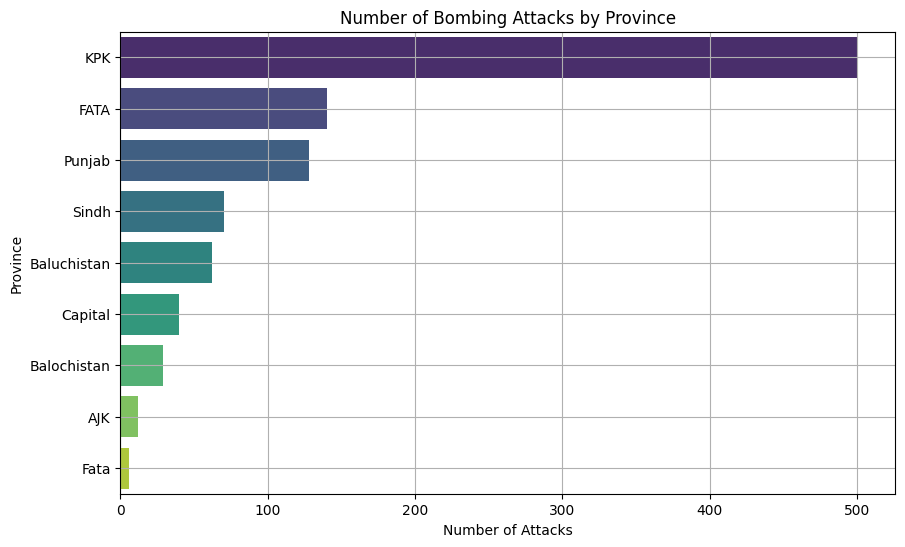

In [ ]:
province_attacks = data.groupby('Province')['Province'].count().reset_index(name='Number of Attacks')

# Display the aggregated data
print(province_attacks)

# Plotting the number of bombing attacks by province
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Attacks', y='Province', data=province_attacks.sort_values(by='Number of Attacks', ascending=False), palette='viridis')

# Customizing the plot
plt.title('Number of Bombing Attacks by Province')
plt.xlabel('Number of Attacks')
plt.ylabel('Province')
plt.grid(True)

# Display the plot
plt.show()

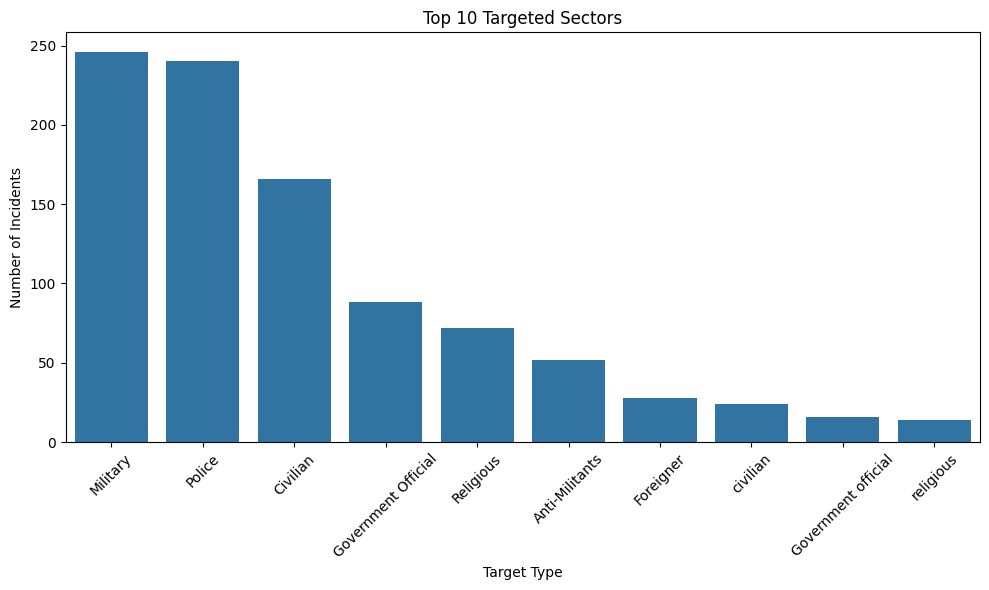

In [ ]:
# Plot targeted sectors
plt.figure(figsize=(10, 6))
sns.countplot(x='Target Type', data=data, order=data['Target Type'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Targeted Sectors')
plt.xlabel('Target Type')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()


<ipython-input-48-83b3f2054852>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Attacks', y='Target Type', data=target_data, palette='viridis')


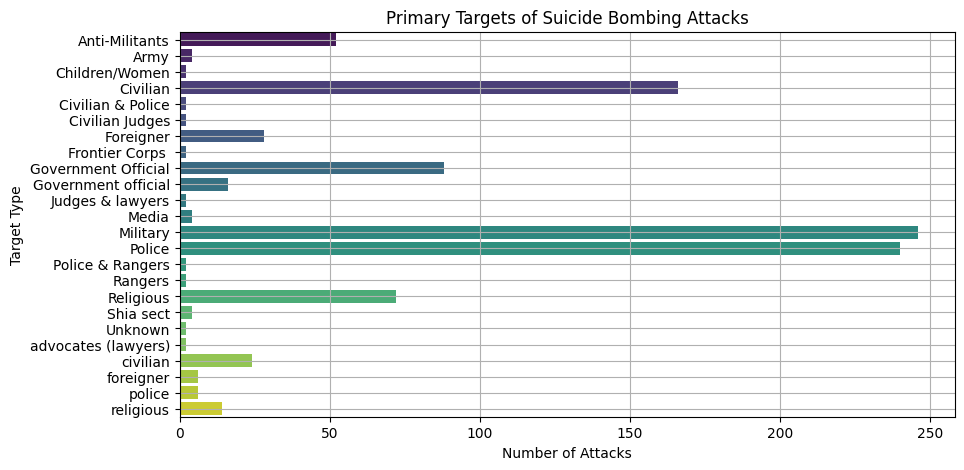

In [ ]:
# Aggregate the data by 'Target Type' and count the occurrences
target_data = data.groupby('Target Type')['Target Type'].count().reset_index(name='Number of Attacks')

plt.figure(figsize=(10, 5))
sns.barplot(x='Number of Attacks', y='Target Type', data=target_data, palette='viridis')
plt.title('Primary Targets of Suicide Bombing Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.grid(True)
plt.show()

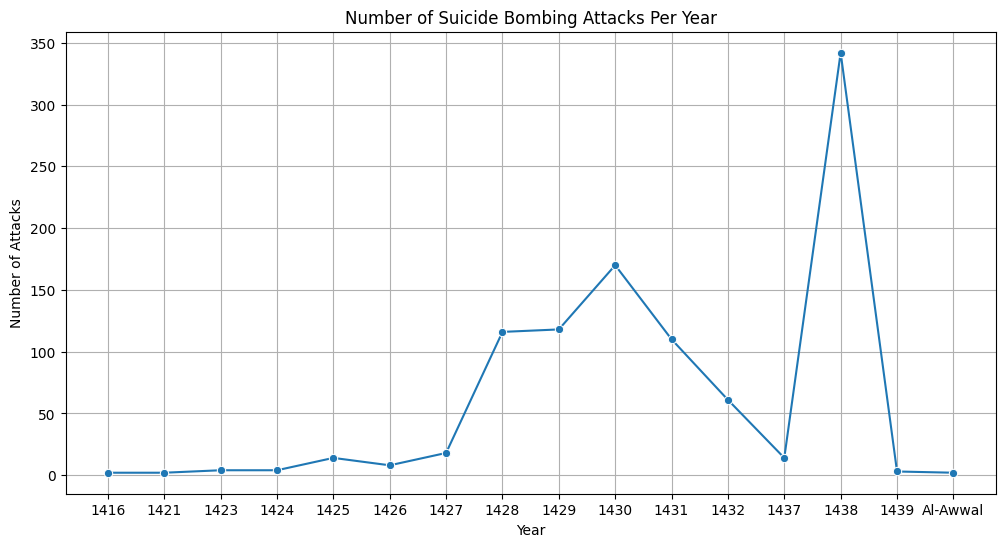

In [ ]:
# Assuming 'year' Series contains the year of each attack
yearly_attacks = year.value_counts().sort_index().reset_index()
yearly_attacks.columns = ['Year', 'Number of Attacks']

# Plotting the number of suicide bombing attacks per year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Attacks', data=yearly_attacks, marker='o')

# Customizing the plot
plt.title('Number of Suicide Bombing Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)

# Display the plot
plt.show()


   Year Target Type  Number of Attacks
0  1995   Foreigner                  2
1  2000       Media                  2
2  2002   Foreigner                  4
3  2003    Military                  2
4  2003   Religious                  2


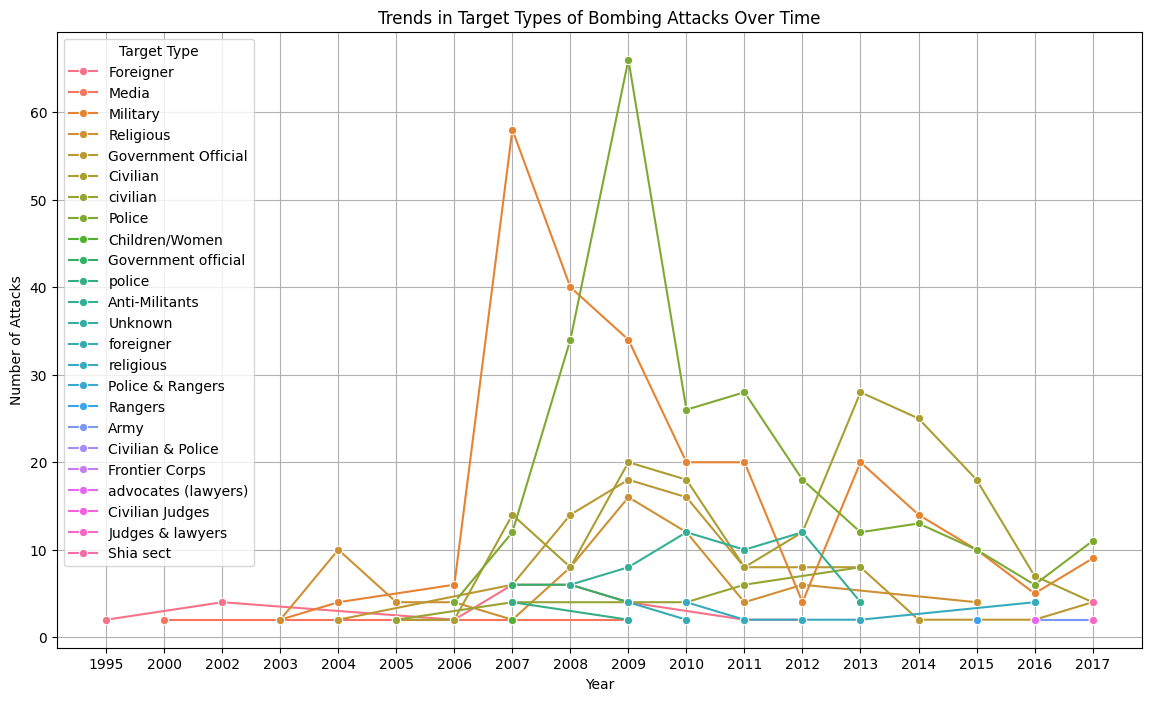

In [ ]:
# Aggregate the data by year and target type
yearly_target_attacks = data.groupby(['Year', 'Target Type'])['Target Type'].count().reset_index(name='Number of Attacks')

# Display the aggregated data
print(yearly_target_attacks.head())


plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Number of Attacks', hue='Target Type', data=yearly_target_attacks, marker='o')

# Customizing the plot
plt.title('Trends in Target Types of Bombing Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Target Type')
plt.grid(True)

# Display the plot
plt.show()

<ipython-input-61-d9647546ef82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=data, palette='viridis')


Text(0, 0.5, 'Number of Incidents')

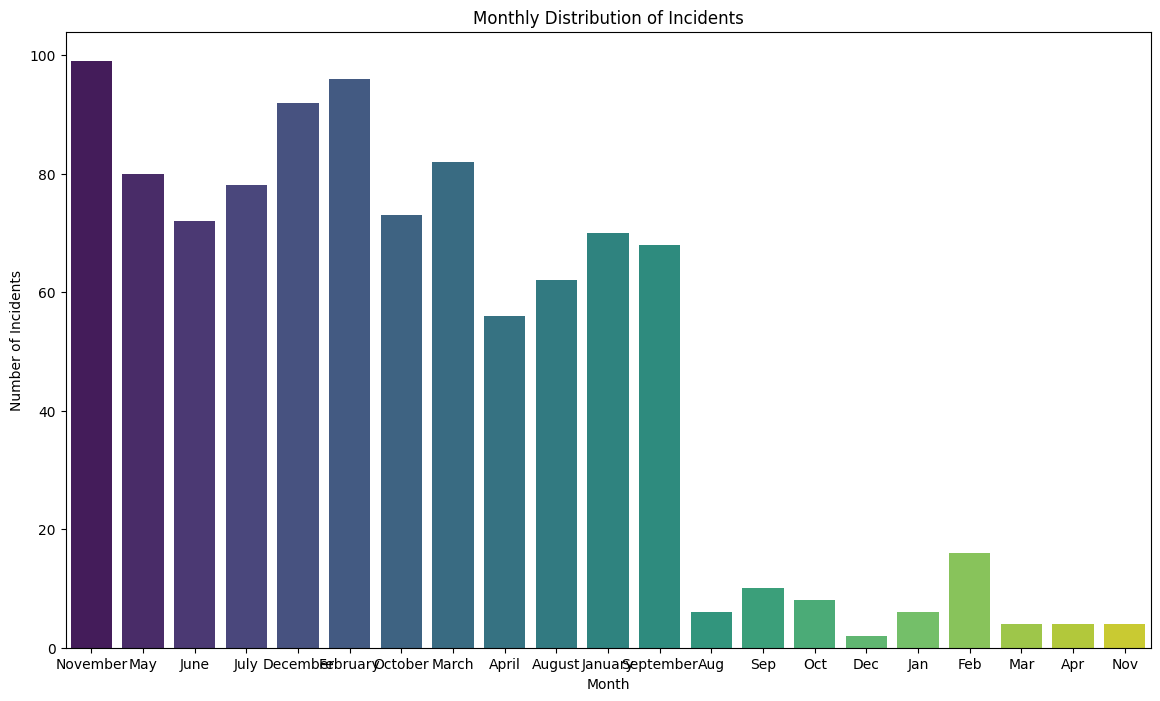

In [ ]:
# Monthly incidents
plt.figure(figsize=(14, 8))
sns.countplot(x='Month', data=data, palette='viridis')
plt.title('Monthly Distribution of Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')

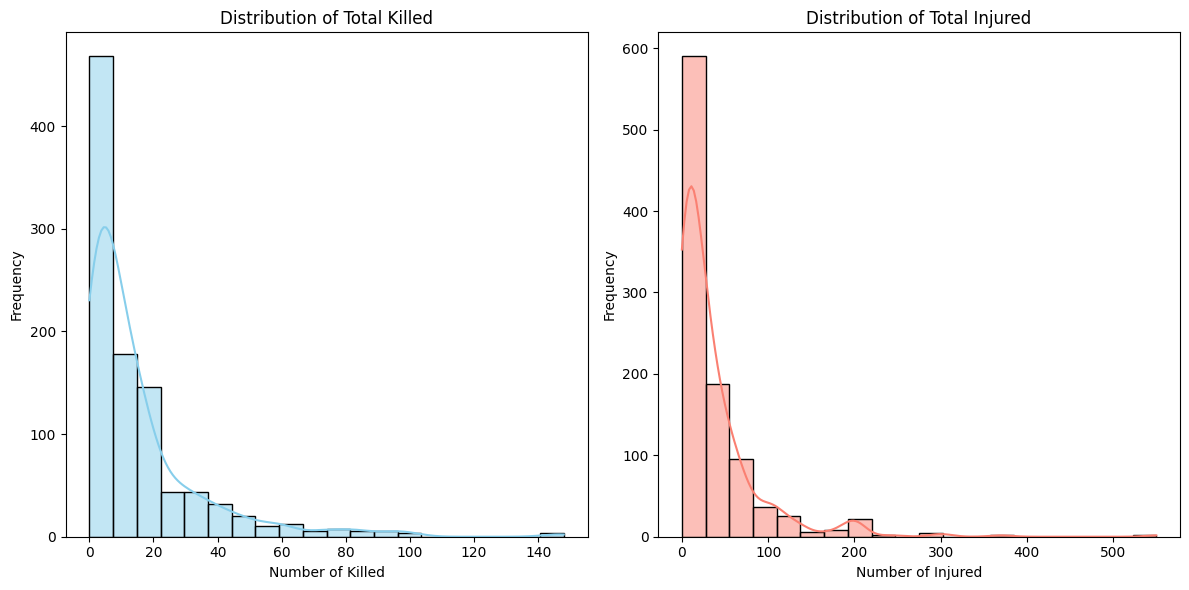

In [ ]:
# Plot distribution of killed and injured
plt.figure(figsize=(12, 6))

# Total killed and injured
plt.subplot(1, 2, 1)
sns.histplot(data['Killed Max'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Killed')
plt.xlabel('Number of Killed')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['Injured Max'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Total Injured')
plt.xlabel('Number of Injured')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-52-ef7fa7687602>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_events.values, y=top_events.index, palette='rocket')


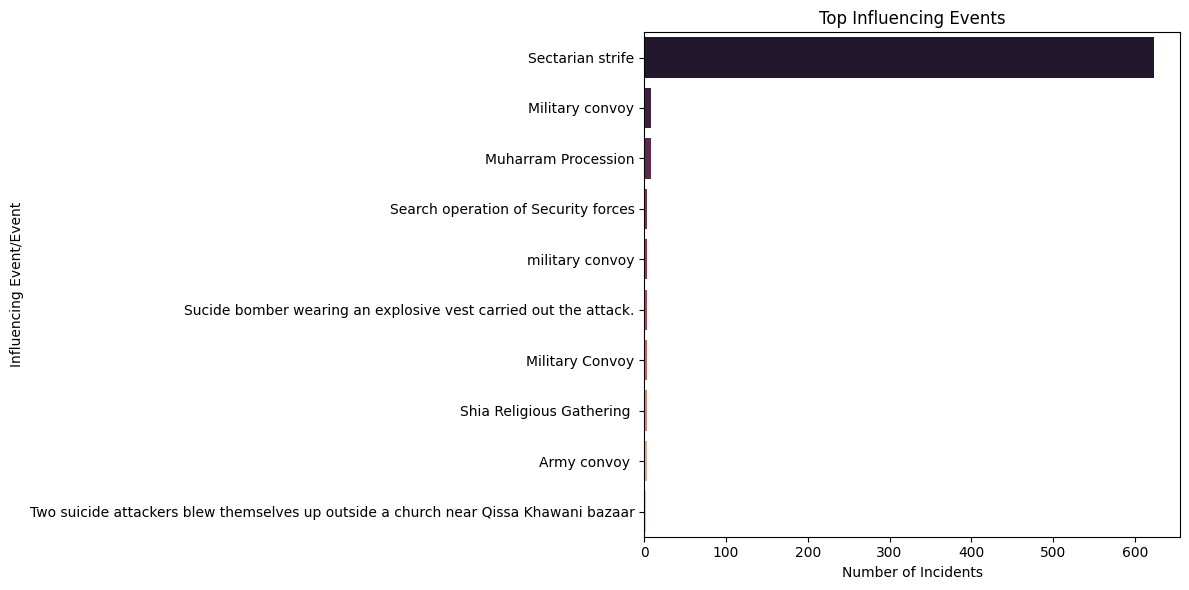

In [ ]:
# Top influencing events leading to incidents
top_events = data['Influencing Event/Event'].value_counts().nlargest(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_events.values, y=top_events.index, palette='rocket')
plt.title('Top Influencing Events')
plt.xlabel('Number of Incidents')
plt.ylabel('Influencing Event/Event')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

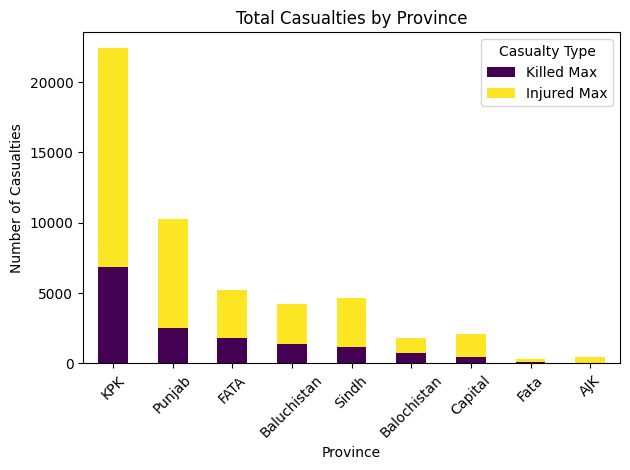

In [ ]:
province_casualties = data.groupby('Province')[['Killed Max', 'Injured Max']].sum().sort_values(by='Killed Max', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 8))
province_casualties.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Total Casualties by Province')
plt.xlabel('Province')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.legend(title='Casualty Type')
plt.tight_layout()
plt.show()

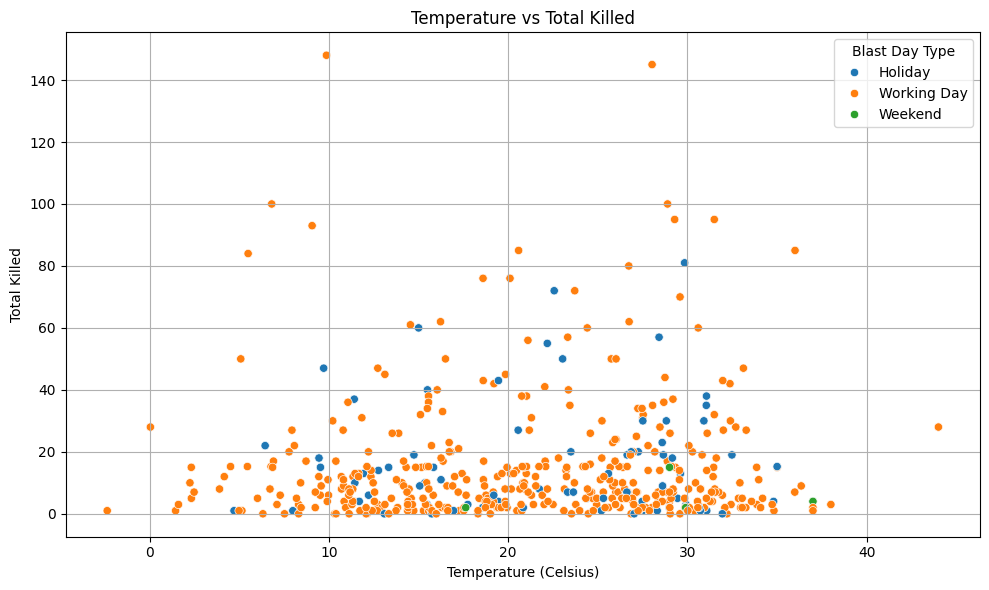

In [ ]:
# Scatter plot of incidents vs temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(C)', y='Killed Max', data=data, hue='Blast Day Type')
plt.title('Temperature vs Total Killed')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Total Killed')
plt.grid(True)
plt.legend(title='Blast Day Type')
plt.tight_layout()
plt.show()

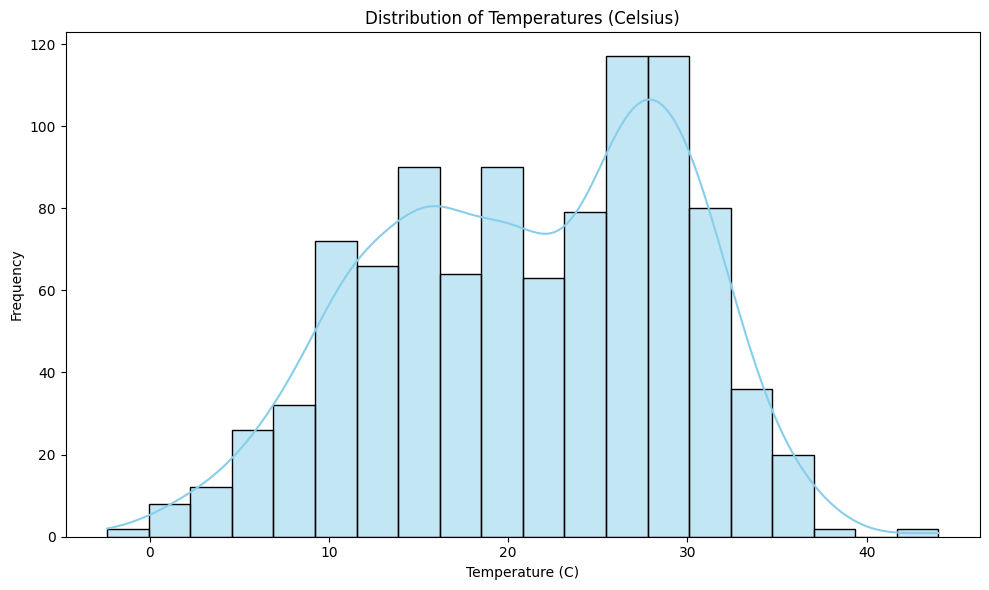

In [ ]:
# Plot distribution of temperatures in Celsius
plt.figure(figsize=(10, 6))
sns.histplot(data['Temperature(C)'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Temperatures (Celsius)')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

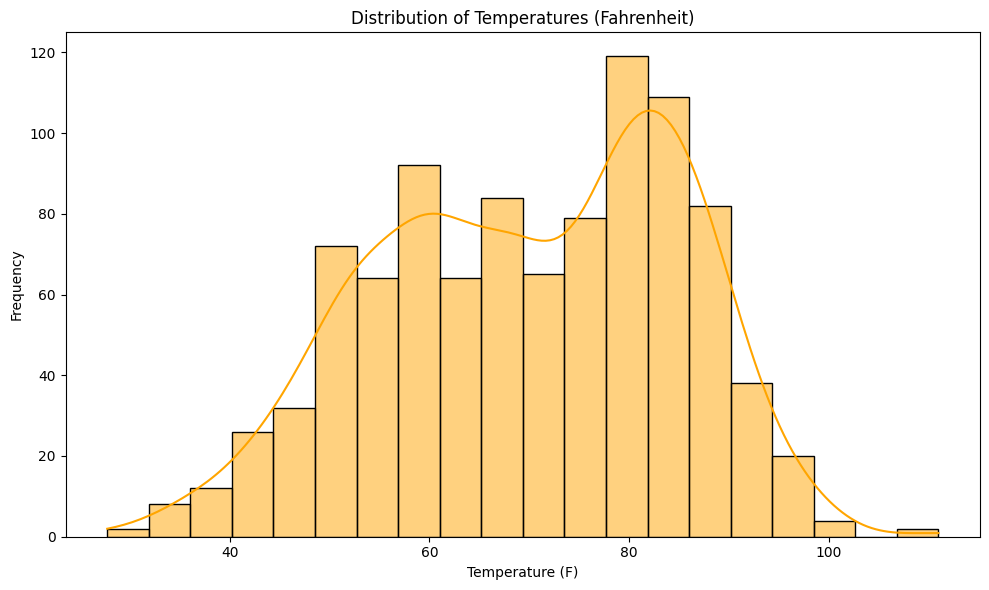

In [ ]:
# Plot distribution of temperatures in Fahrenheit
plt.figure(figsize=(10, 6))
sns.histplot(data['Temperature(F)'].dropna(), bins=20, kde=True, color='orange')
plt.title('Distribution of Temperatures (Fahrenheit)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-78-f77e2b257ef8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Blast Day Type', y='Temperature(C)', data=data, palette='Set1')


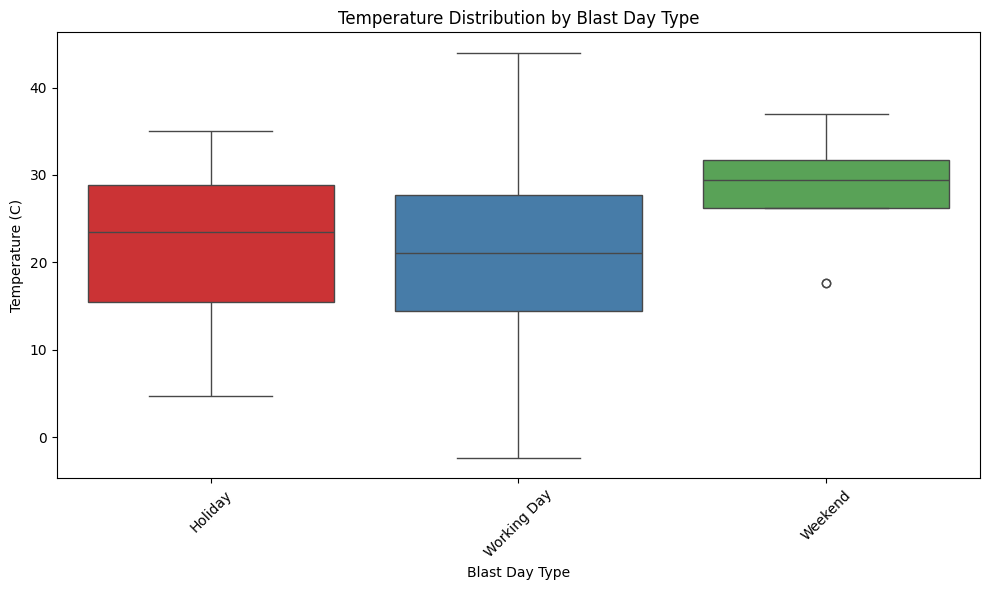

In [ ]:
# Plot temperature distribution for different Blast Day Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Blast Day Type', y='Temperature(C)', data=data, palette='Set1')
plt.title('Temperature Distribution by Blast Day Type')
plt.xlabel('Blast Day Type')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-80-658c4255ee32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location Sensitivity', y='Temperature(C)', data=data, palette='Set1')


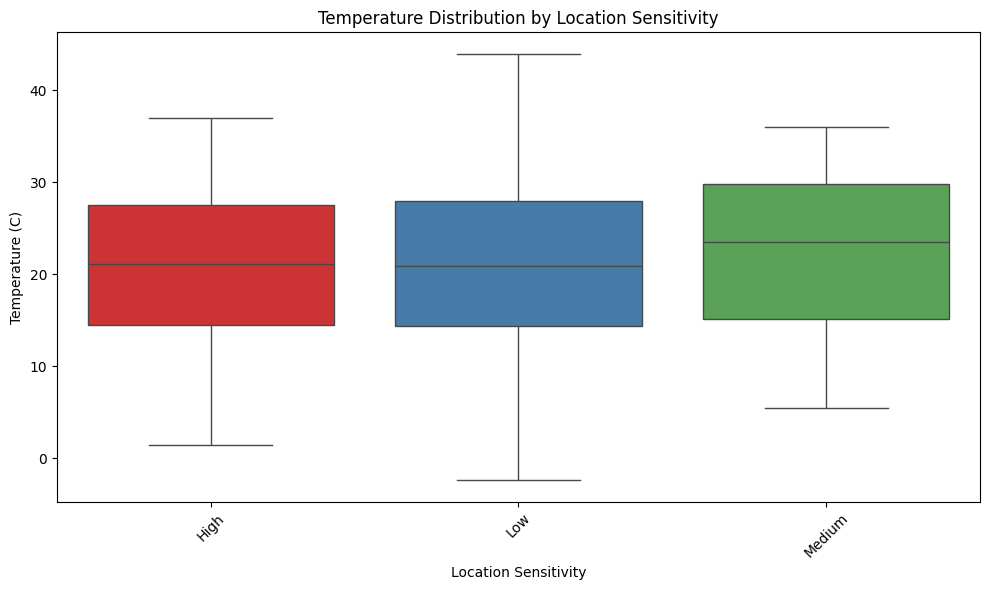

In [ ]:
# Plot temperature distribution for different Location Sensitivity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location Sensitivity', y='Temperature(C)', data=data, palette='Set1')
plt.title('Temperature Distribution by Location Sensitivity')
plt.xlabel('Location Sensitivity')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

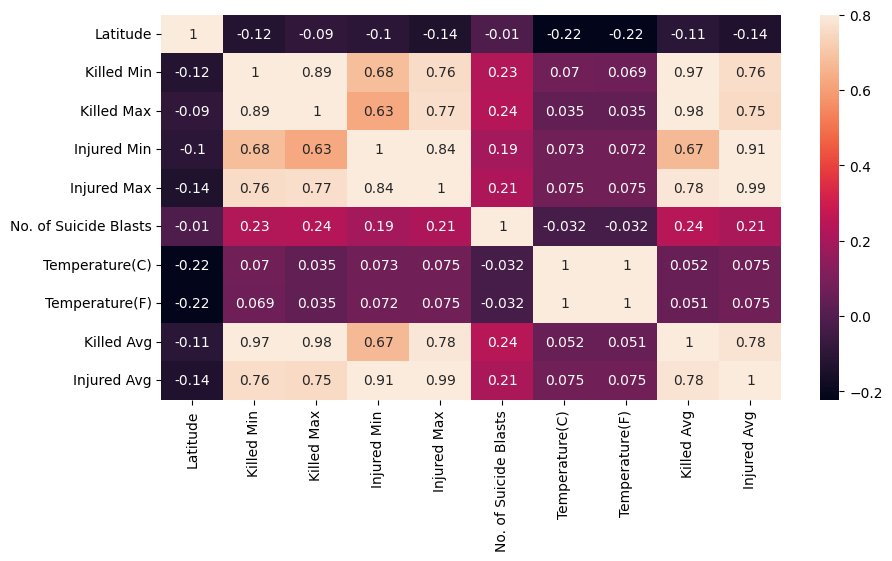

In [ ]:
plt.figure(figsize=(10,5))
corr = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, vmax=0.8, annot=True);